# Local-Global-Trend(LGT) Example

In [1]:
import pandas as pd
import numpy as np
from orbit.lgt import LGT
from orbit.utils.utils import plot_predicted_data

## Data

In [7]:
DATA_FILE = "./data/iclaims.example.csv"

In [8]:
raw_df = pd.read_csv(DATA_FILE, parse_dates=['week'])

In [9]:
raw_df.dtypes

week              datetime64[ns]
claims                     int64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
dtype: object

In [10]:
raw_df.head(5)

,week,claims,trend.unemploy,trend.filling,trend.job
0,2010-01-03,651215,1.183973,0.720140,1.119669
1,2010-01-10,825891,1.183973,0.814896,1.178599
2,2010-01-17,659173,1.203382,0.739091,1.119669
3,2010-01-24,507651,1.164564,0.814896,1.107883
4,2010-01-31,538617,1.086926,0.776993,1.072525


### Train / Test Split

In [25]:
df=raw_df.copy()
test_size=52
train_df=df[:-test_size]

# in uTS we make assertion that test dates need to be between train start/end
test_df=df[-test_size:]

In [26]:
train_df.head(5)

,week,claims,trend.unemploy,trend.filling,trend.job
0,2010-01-03,651215,1.183973,0.720140,1.119669
1,2010-01-10,825891,1.183973,0.814896,1.178599
2,2010-01-17,659173,1.203382,0.739091,1.119669
3,2010-01-24,507651,1.164564,0.814896,1.107883
4,2010-01-31,538617,1.086926,0.776993,1.072525


## MAP Fit and Predict

In [27]:
lgt_map=LGT(
    response_col="claims",
    date_col="week",
    seasonality=52,
    seed=8888,
    predict_method='map',
    auto_scale=False,
    is_multiplicative=True
)

In [28]:
lgt_map.fit(df=train_df)

In [29]:
predicted_df = lgt_map.predict(df=test_df)

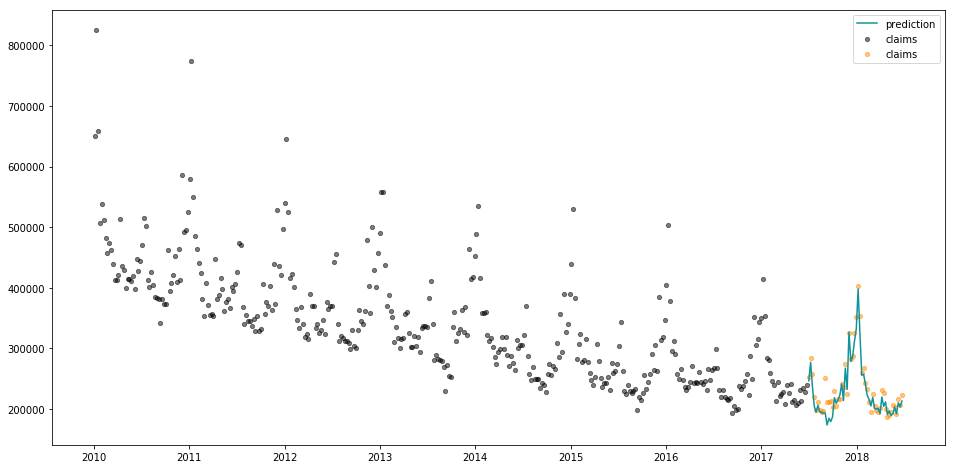

In [30]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col=lgt_map.date_col, actual_col=lgt_map.response_col, pred_col='prediction', 
                    test_actual_df=test_df)

In [31]:
test_df.head(5)

,week,claims,trend.unemploy,trend.filling,trend.job
391,2017-07-02,252886,1.183973,1.099162,0.919307
392,2017-07-09,284329,1.222792,1.023357,1.025381
393,2017-07-16,257763,1.145154,1.061259,0.990023
394,2017-07-23,220455,1.125745,1.023357,1.025381
395,2017-07-30,198776,1.145154,1.042308,1.048953


## MCMC Fit and Predict

In [32]:
lgt_mcmc = LGT(
    response_col='claims',
    date_col='week',
    seasonality=52,
    num_warmup=4000, 
    num_sample=500,
    sample_method='mcmc',
    predict_method='full',
    n_bootstrap_draws=500
)

In [33]:
lgt_mcmc.fit(df=train_df)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [34]:
predicted_df = lgt_mcmc.predict(df=test_df)

In [35]:
predicted_df.tail(5)

,week,5,50,95
47,2018-05-27,181579.437751,205960.364371,228282.077951
48,2018-06-03,171633.673421,193965.927092,215737.220342
49,2018-06-10,190443.632080,212825.664478,238383.490521
50,2018-06-17,181623.787006,206625.891512,231870.011460
51,2018-06-24,191559.223227,216396.738624,243439.746252


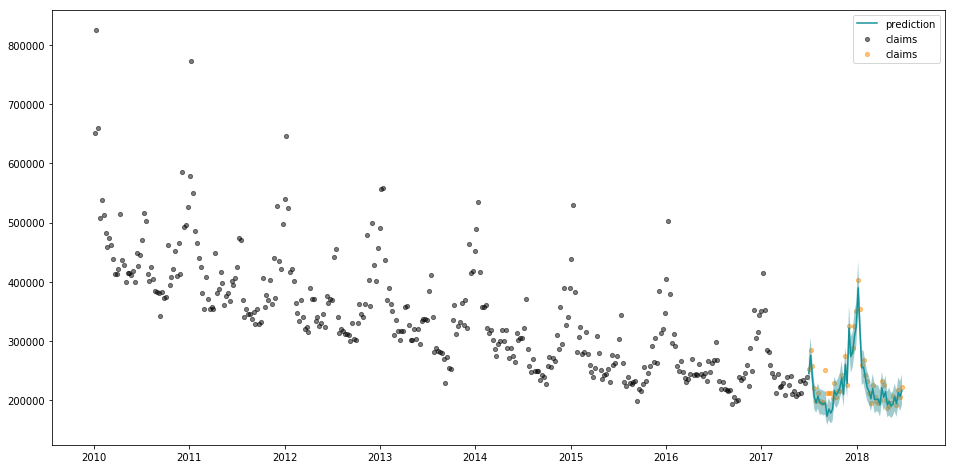

In [36]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col=lgt_mcmc.date_col, actual_col=lgt_mcmc.response_col, pred_col=50, 
                    pred_quantiles_col=[5,95], test_actual_df=test_df)

## Mean Fit and Predict Decomp

In [37]:
lgt_mean=LGT(
    response_col='claims',
    date_col='week',
    seasonality=52,
    seed=8888,
    predict_method='mean'
)

In [38]:
lgt_mean.fit(df=train_df)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [39]:
predicted_df = lgt_mean.predict(df=test_df, decompose=True)

In [40]:
predicted_df.head(5)

,week,prediction,trend,seasonality,regression
0,2017-07-02,243992.877597,266968.823307,0.913938,1.0
1,2017-07-09,273856.280348,266192.713613,1.028790,1.0
2,2017-07-16,235407.484555,265515.070117,0.886607,1.0
3,2017-07-23,203367.988019,264879.097288,0.767777,1.0
4,2017-07-30,193354.283255,264261.244600,0.731679,1.0


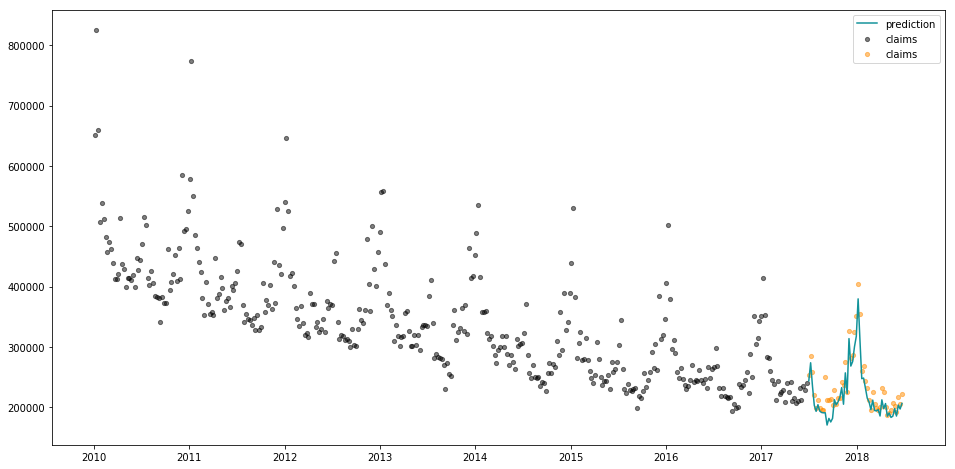

In [41]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col=lgt_mean.date_col, actual_col=lgt_mean.response_col, pred_col='prediction', 
                    test_actual_df=test_df)

## MAP Fit and Decomp with Regression

In [42]:
lgt_reg=LGT(
    response_col='claims',
    regressor_col=['trend.unemploy', 'trend.filling'],
    date_col='week',
    seasonality=52,
    seed=8888,
    predict_method='map'
)

In [43]:
lgt_reg.fit(df=train_df)

In [44]:
predicted_df = lgt_reg.predict(df=test_df, decompose=True)

In [45]:
predicted_df.head(5)

,week,prediction,trend,seasonality,regression
0,2017-07-02,245734.758433,256640.836008,0.943372,1.014981
1,2017-07-09,275479.555617,255840.520867,1.065368,1.010696
2,2017-07-16,235366.903799,255365.808422,0.911933,1.010694
3,2017-07-23,202828.684838,254914.497662,0.790111,1.007040
4,2017-07-30,194908.043692,254465.607946,0.758926,1.009256
